# Importando Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.feature_selection import SequentialFeatureSelector, RFECV
from scipy.stats import reciprocal, uniform
import numpy as np

In [2]:
import warnings

warnings.filterwarnings('ignore')

# Lendo os dados

In [3]:
df = pd.read_csv('train.csv')
df_submit = pd.read_csv('test.csv')

# EDA

## Dicionário de Dados

- `PassengerId:` A unique Id for each passenger.
- `HomePlanet:` The planet the passenger departed from, typically their planet of permanent residence.
- `CryoSleep:` Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage.
- `Cabin:` The cabin number where the passenger is staying.
- `Destination:` The planet the passenger will be debarking to.
- `Age:` The age of the passenger.
- `VIP:` Whether the passenger has paid for special VIP service during the voyage.
- `RoomService:` Amount the passenger has billed for room service.
- `FoodCourt:` Amount the passenger has billed at the food court.
- `ShoppingMall:` Amount the passenger has billed at the shopping mall.
- `Spa:` Amount the passenger has billed at the spa.
- `VRDeck:` Amount the passenger has billed at the VR deck.
- `Name:` The name of the passenger.
- `Transported:` Whether the passenger was transported to another dimension.

### NaN

In [4]:
round(df.isna().sum()/len(df)*100,2)

PassengerId     0.00
HomePlanet      2.31
CryoSleep       2.50
Cabin           2.29
Destination     2.09
Age             2.06
VIP             2.34
RoomService     2.08
FoodCourt       2.11
ShoppingMall    2.39
Spa             2.11
VRDeck          2.16
Name            2.30
Transported     0.00
dtype: float64

### HomePlanet

In [5]:
round(df['HomePlanet'].value_counts()/len(df)*100,2)

Earth     52.94
Europa    24.51
Mars      20.23
Name: HomePlanet, dtype: float64

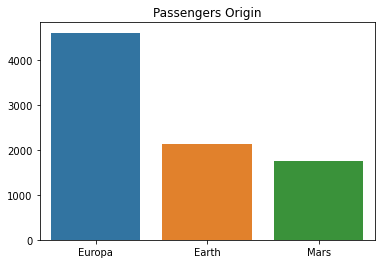

In [6]:
sns.barplot(data=df, x=df['HomePlanet'].dropna().unique(), y=df['HomePlanet'].value_counts().values)
plt.title('Passengers Origin')
plt.show()

### CryoSleep

In [7]:
df['CryoSleep'].unique()

array([False, True, nan], dtype=object)

In [8]:
round(df['CryoSleep'].value_counts()/len(df)*100,2)

False    62.57
True     34.94
Name: CryoSleep, dtype: float64

In [9]:
false = round(df['CryoSleep'].value_counts()/len(df)*100,2)[0]
true = round(df['CryoSleep'].value_counts()/len(df)*100,2)[1]
nan = 100 - false - true

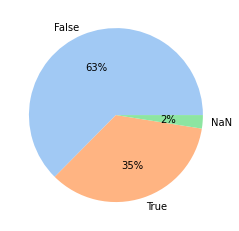

In [10]:
data = [false, true, nan]
labels = ['False', 'True', 'NaN']

colors = sns.color_palette('pastel')[0:3]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

### Cabin

In [11]:
df['Cabin'].nunique()

6560

In [12]:
len(df)

8693

In [13]:
cabin_df = pd.pivot_table(df, values='PassengerId', aggfunc='count', columns='Cabin').T
cabin_df.sort_values('PassengerId', ascending=False, inplace=True)
cabin_df = cabin_df[cabin_df['PassengerId'] > 6]
cabin_df.reset_index(inplace=True)
cabin_df

,Cabin,PassengerId
0,G/734/S,8
1,C/21/P,7
2,G/1368/P,7
3,B/82/S,7
4,G/981/S,7
5,C/137/S,7
6,F/1411/P,7
7,G/1476/S,7
8,B/201/P,7
9,D/176/S,7


Será que essas cabines que têm mais de 1 passageiro, são passageiros da mesma família?

In [14]:
def get_cabin(cabin):
    if cabin in cabin_df['Cabin'].tolist():
        return True
    else:
        return False

In [15]:
cabin2_df = pd.pivot_table(df, values='PassengerId', aggfunc='count', columns=['Cabin','Name']).T
cabin2_df.reset_index(inplace=True)
cabin2_df['MoreThanOne'] = cabin2_df['Cabin'].map(lambda x: get_cabin(x))
cabin2_df = cabin2_df.loc[cabin2_df['MoreThanOne']==True]
cabin2_df.drop(['MoreThanOne','PassengerId'], axis=1, inplace=True)
cabin2_df

,Cabin,Name
273,B/11/S,Achib Pirejus
274,B/11/S,Bram Pirejus
275,B/11/S,Marfak Pirejus
276,B/11/S,Muonons Pirejus
277,B/11/S,Naslon Pirejus
...,...,...
8254,G/981/S,Dord Steinardson
8255,G/981/S,Etha Ellson
8256,G/981/S,Fanne Steinardson
8257,G/981/S,Hatty Ellson


Aparentemente sim, mas também podem ser amigos que estejam dividindo a cabine também (Alô Groupon)

### Destination

In [16]:
df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

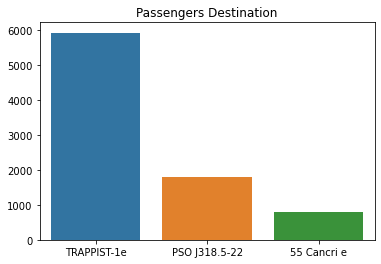

In [17]:
sns.barplot(data=df, x=df['Destination'].dropna().unique(), y=df['Destination'].value_counts().values)
plt.title('Passengers Destination')
plt.show()

### Age

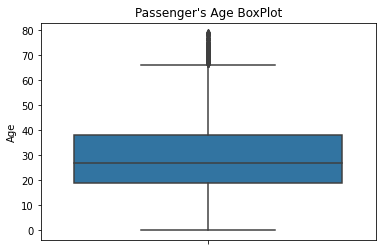

In [18]:
sns.boxplot(data = df, y='Age')
plt.title('Passenger\'s Age BoxPlot')
plt.show()

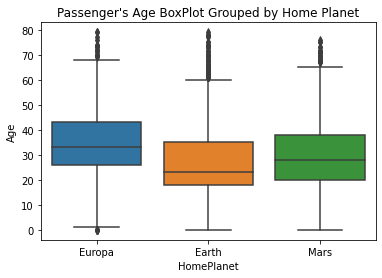

In [19]:
sns.boxplot(data = df, y='Age', x='HomePlanet')
plt.title('Passenger\'s Age BoxPlot Grouped by Home Planet')
plt.show()

Nenéns e idosos viajando no espaço oO

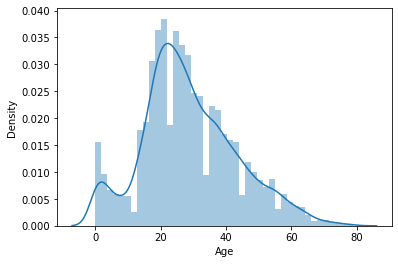

In [20]:
sns.distplot(df['Age'])
plt.show()

In [21]:
df_babies = df.loc[df['Age'] == 0]
df_babies

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
19,0017_01,Earth,False,G/0/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Lyde Brighttt,True
61,0067_01,Earth,True,G/10/S,PSO J318.5-22,0.0,False,0.0,0.0,0.0,0.0,0.0,Ninaha Leeves,True
86,0092_02,Earth,True,G/9/P,TRAPPIST-1e,0.0,False,0.0,0.0,NaN,0.0,0.0,Stald Hewson,True
102,0108_03,Earth,False,G/19/S,TRAPPIST-1e,0.0,NaN,0.0,0.0,0.0,0.0,0.0,Oline Handertiz,True
157,0179_02,Earth,False,G/26/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Raque Webstephrey,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8494,9074_01,Earth,True,G/1460/S,TRAPPIST-1e,0.0,NaN,0.0,0.0,NaN,0.0,0.0,Adamie Trerady,True
8584,9163_01,Earth,True,G/1477/S,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Idace Edwartizman,True
8650,9227_04,Earth,True,G/1498/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Robyny Hinglendez,True
8654,9231_02,Mars,False,F/1888/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Walls Paie,True


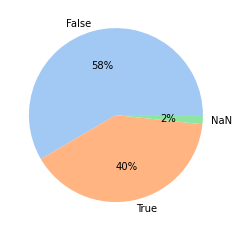

In [22]:
normal_babies = round(df_babies['CryoSleep'].value_counts()/len(df_babies)*100,2)[0]
cryo_babies = round(df_babies['CryoSleep'].value_counts()/len(df_babies)*100,2)[1]
nan_babies = 100 - normal_babies - cryo_babies

babies_data = [normal_babies, cryo_babies, nan_babies]
labels = ['False', 'True', 'NaN']

colors = sns.color_palette('pastel')[0:3]

plt.pie(babies_data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

### VIP

In [23]:
df['VIP'].unique()

array([False, True, nan], dtype=object)

In [24]:
round(df['VIP'].value_counts()/len(df)*100,2)

False    95.38
True      2.29
Name: VIP, dtype: float64

In [25]:
non_vip = round(df['VIP'].value_counts()/len(df)*100,2)[0]
vip = round(df['VIP'].value_counts()/len(df)*100,2)[1]
nan = 100 - false - true

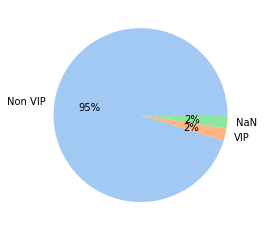

In [26]:
data = [non_vip, vip, nan]
labels = ['Non VIP', 'VIP', 'NaN']

colors = sns.color_palette('pastel')[0:3]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

#### **VIP x CryoSleep**

Será que existe algum padrão nos VIPs com relação a CryoSleep?

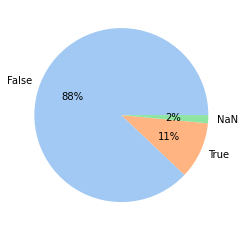

In [27]:
df_vip = df.loc[df['VIP'] == True]

false = round(df_vip['CryoSleep'].value_counts()/len(df_vip)*100,2)[0]
true = round(df_vip['CryoSleep'].value_counts()/len(df_vip)*100,2)[1]
nan = 100 - false - true

data = [false, true, nan]
labels = ['False', 'True', 'NaN']

colors = sns.color_palette('pastel')[0:3]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

A maioria dos VIPs NÃO estão em CryoSleep. E os não vip?

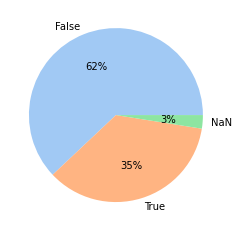

In [28]:
df_non_vip = df.loc[df['VIP'] == False]

false = round(df_non_vip['CryoSleep'].value_counts()/len(df_non_vip)*100,2)[0]
true = round(df_non_vip['CryoSleep'].value_counts()/len(df_non_vip)*100,2)[1]
nan = 100 - false - true

data = [false, true, nan]
labels = ['False', 'True', 'NaN']

colors = sns.color_palette('pastel')[0:3]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

Um maior percentual dos não VIP está em CryoSleep.

#### **VIP x HomePlanet**

In [29]:
df_vip_planet = pd.pivot_table(df, values='PassengerId', aggfunc='count', columns=['HomePlanet', 'VIP']).T
df_vip_planet.reset_index(inplace=True)
df_vip_planet

,HomePlanet,VIP,PassengerId
0,Earth,False,4487
1,Europa,False,1958
2,Europa,True,131
3,Mars,False,1653
4,Mars,True,63


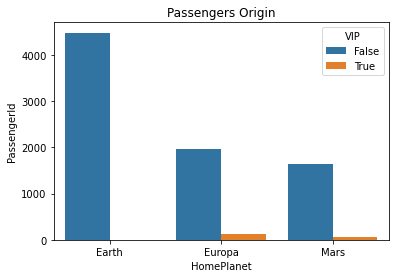

In [30]:
sns.barplot(data=df_vip_planet, x='HomePlanet', y='PassengerId', hue='VIP')
plt.title('Passengers Origin')
plt.show()

#### **VIP x Destination**

In [31]:
df_vip_destiny = pd.pivot_table(df, values='PassengerId', aggfunc='count', columns=['Destination', 'VIP']).T
df_vip_destiny.reset_index(inplace=True)
df_vip_destiny

,Destination,VIP,PassengerId
0,55 Cancri e,False,1692
1,55 Cancri e,True,65
2,PSO J318.5-22,False,756
3,PSO J318.5-22,True,18
4,TRAPPIST-1e,False,5667
5,TRAPPIST-1e,True,114


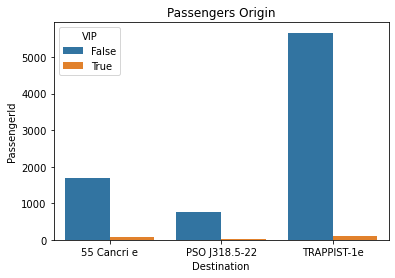

In [32]:
sns.barplot(data=df_vip_destiny, x='Destination', y='PassengerId', hue='VIP')
plt.title('Passengers Origin')
plt.show()

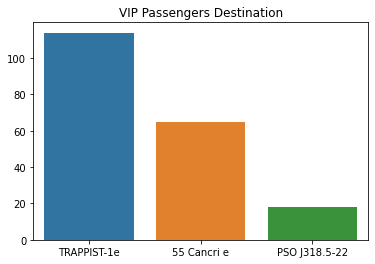

In [33]:
df_vip_destiny = df.loc[df['VIP'] == True]

sns.barplot(data=df_vip_destiny, x=df_vip_destiny['Destination'].dropna().unique(), y=df_vip_destiny['Destination'].value_counts().values)
plt.title('VIP Passengers Destination')
plt.show()

#### **VIP x Age**

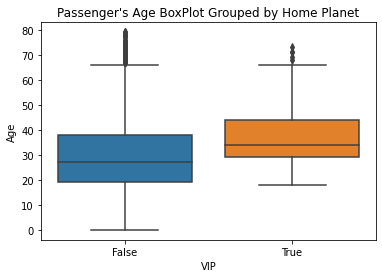

In [34]:
sns.boxplot(data = df, y='Age', x='VIP')
plt.title('Passenger\'s Age BoxPlot Grouped by Home Planet')
plt.show()

O cabeça branca é o dono da lancha... (risos)

### RoomService

In [35]:
df['RoomService'].describe()

count     8512.000000
mean       224.687617
std        666.717663
min          0.000000
25%          0.000000
50%          0.000000
75%         47.000000
max      14327.000000
Name: RoomService, dtype: float64

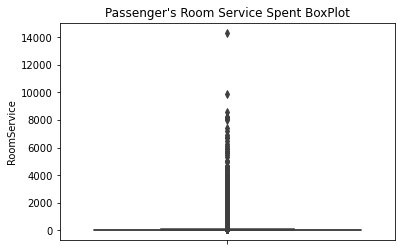

In [36]:
sns.boxplot(data = df, y='RoomService')
plt.title('Passenger\'s Room Service Spent BoxPlot')
plt.show()

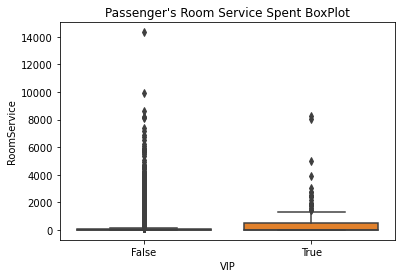

In [37]:
sns.boxplot(data = df, y='RoomService', x='VIP')
plt.title('Passenger\'s Room Service Spent BoxPlot')
plt.show()

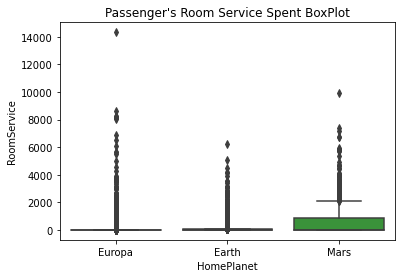

In [38]:
sns.boxplot(data = df, y='RoomService', x='HomePlanet')
plt.title('Passenger\'s Room Service Spent BoxPlot')
plt.show()

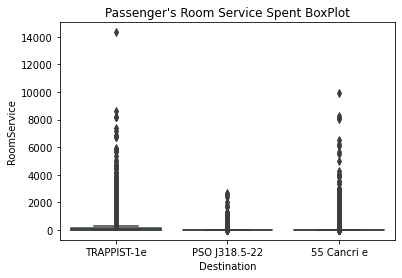

In [39]:
sns.boxplot(data = df, y='RoomService', x='Destination')
plt.title('Passenger\'s Room Service Spent BoxPlot')
plt.show()

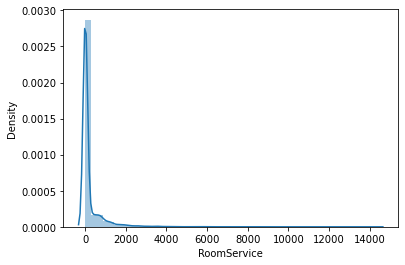

In [40]:
sns.distplot(df['RoomService'])
plt.show()

### FoodCourt

In [41]:
df['FoodCourt'].describe()

count     8510.000000
mean       458.077203
std       1611.489240
min          0.000000
25%          0.000000
50%          0.000000
75%         76.000000
max      29813.000000
Name: FoodCourt, dtype: float64

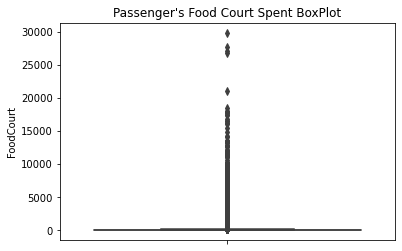

In [42]:
sns.boxplot(data = df, y='FoodCourt')
plt.title('Passenger\'s Food Court Spent BoxPlot')
plt.show()

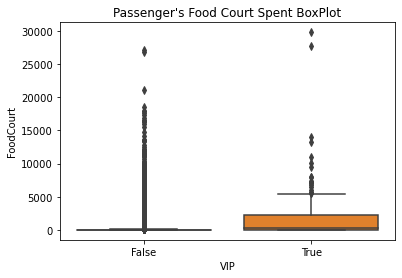

In [43]:
sns.boxplot(data = df, y='FoodCourt', x='VIP')
plt.title('Passenger\'s Food Court Spent BoxPlot')
plt.show()

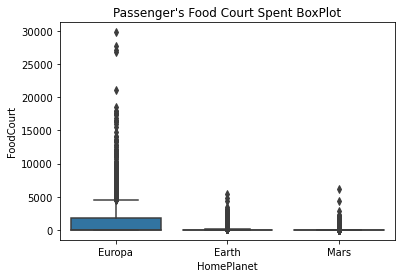

In [44]:
sns.boxplot(data = df, y='FoodCourt', x='HomePlanet')
plt.title('Passenger\'s Food Court Spent BoxPlot')
plt.show()

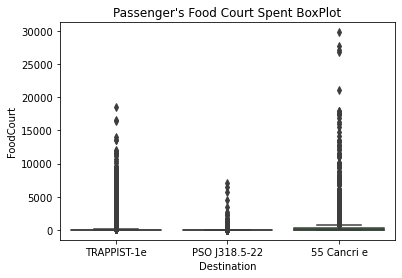

In [45]:
sns.boxplot(data = df, y='FoodCourt', x='Destination')
plt.title('Passenger\'s Food Court Spent BoxPlot')
plt.show()

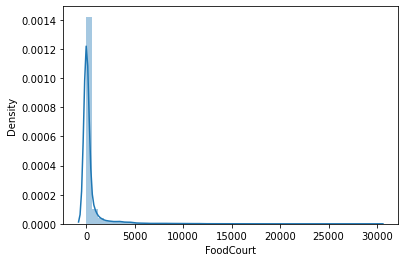

In [46]:
sns.distplot(df['FoodCourt'])
plt.show()

### ShoppingMall

In [47]:
df['ShoppingMall'].describe()

count     8485.000000
mean       173.729169
std        604.696458
min          0.000000
25%          0.000000
50%          0.000000
75%         27.000000
max      23492.000000
Name: ShoppingMall, dtype: float64

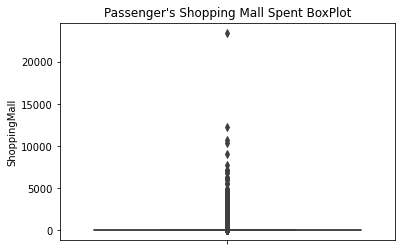

In [48]:
sns.boxplot(data = df, y='ShoppingMall')
plt.title('Passenger\'s Shopping Mall Spent BoxPlot')
plt.show()

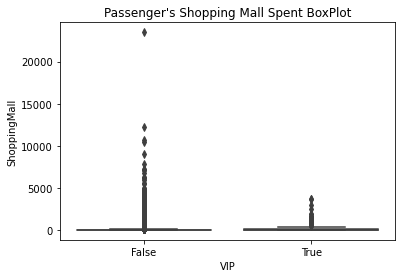

In [49]:
sns.boxplot(data = df, y='ShoppingMall', x='VIP')
plt.title('Passenger\'s Shopping Mall Spent BoxPlot')
plt.show()

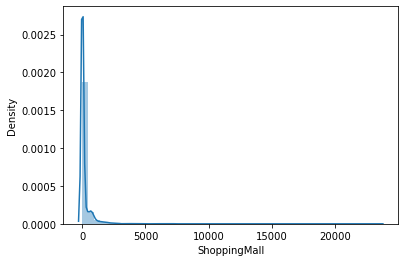

In [50]:
sns.distplot(df['ShoppingMall'])
plt.show()

### Spa

In [51]:
df['Spa'].describe()

count     8510.000000
mean       311.138778
std       1136.705535
min          0.000000
25%          0.000000
50%          0.000000
75%         59.000000
max      22408.000000
Name: Spa, dtype: float64

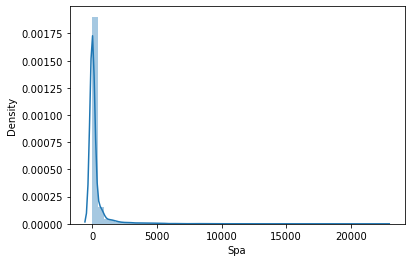

In [52]:
sns.distplot(df['Spa'])
plt.show()

### VRDeck

In [53]:
df['VRDeck'].describe()

count     8505.000000
mean       304.854791
std       1145.717189
min          0.000000
25%          0.000000
50%          0.000000
75%         46.000000
max      24133.000000
Name: VRDeck, dtype: float64

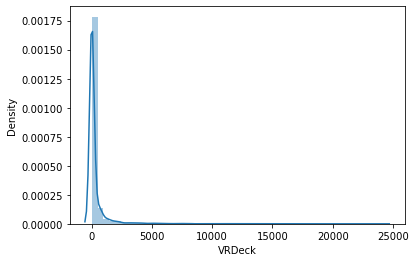

In [54]:
sns.distplot(df['VRDeck'])
plt.show()

### Transported

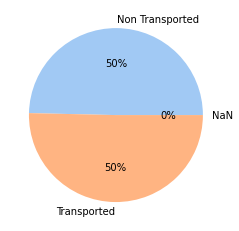

In [55]:
false = round(df['Transported'].value_counts()/len(df)*100,2)[0]
true = round(df['Transported'].value_counts()/len(df)*100,2)[1]
nan = 100 - false - true

data = [false, true, nan]
labels = ['Non Transported', 'Transported', 'NaN']

colors = sns.color_palette('pastel')[0:3]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

# Data Prep

## Train-Test Split

In [56]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=123)

## Feature Engineering

#### Convertendo Boolean em 0 e 1

In [57]:
df_train['Transported'] = df_train['Transported'].map(lambda x: 1 if x else 0)
df_train['CryoSleep'] = df_train['CryoSleep'].map(lambda x: 1 if x else 0)
df_train['VIP'] = df_train['CryoSleep'].map(lambda x: 1 if x else 0)
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
2743,2944_03,Earth,1,G/469/S,55 Cancri e,29.0,1,0.0,0.0,0.0,0.0,0.0,Sta Nichoan,0
5928,6290_01,Earth,0,G/1013/P,TRAPPIST-1e,36.0,0,78.0,9.0,0.0,0.0,841.0,Kentha Beangley,1
4794,5116_01,Mars,1,F/980/S,TRAPPIST-1e,25.0,1,0.0,0.0,0.0,0.0,0.0,Ars Prity,1
7057,7510_01,Mars,0,F/1435/S,55 Cancri e,18.0,0,1092.0,0.0,208.0,150.0,0.0,Pars Horte,0
7417,7935_01,Earth,0,F/1520/S,TRAPPIST-1e,41.0,0,84.0,0.0,6.0,811.0,2.0,Ward Rodger,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7382,7891_02,Earth,1,NaN,TRAPPIST-1e,13.0,1,34.0,1.0,0.0,824.0,29.0,Rosey Duffmaney,0
7763,8287_01,Mars,0,E/542/S,TRAPPIST-1e,21.0,0,1242.0,0.0,654.0,0.0,0.0,Toat Nanie,0
5218,5566_01,Europa,0,E/349/P,55 Cancri e,72.0,0,2445.0,3023.0,0.0,704.0,20.0,Gluinon Gloyanthy,0
1346,1424_01,Europa,1,B/47/P,TRAPPIST-1e,32.0,1,0.0,0.0,0.0,0.0,0.0,Sarid Sageng,1


In [58]:
df_test['Transported'] = df_test['Transported'].map(lambda x: 1 if x else 0)
df_test['CryoSleep'] = df_test['CryoSleep'].map(lambda x: 1 if x else 0)
df_test['VIP'] = df_test['CryoSleep'].map(lambda x: 1 if x else 0)
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
5734,6076_01,Earth,1,G/988/S,TRAPPIST-1e,18.0,1,14.0,2.0,144.0,610.0,0.0,Therry Cames,1
8392,8970_01,Europa,0,C/300/P,55 Cancri e,28.0,0,NaN,3751.0,0.0,5025.0,11741.0,Batomam Clugeammy,0
8120,8671_01,Europa,0,A/90/P,55 Cancri e,29.0,0,1.0,764.0,1.0,265.0,1539.0,Avijava Ticagent,1
769,0809_02,Mars,0,F/151/S,TRAPPIST-1e,NaN,0,1227.0,42.0,1.0,0.0,0.0,Crin Meake,0
5382,5750_01,Earth,0,E/363/P,TRAPPIST-1e,18.0,0,0.0,625.0,0.0,0.0,356.0,Herina Parklaney,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6777,7156_04,Mars,0,E/475/S,TRAPPIST-1e,11.0,0,0.0,0.0,0.0,0.0,0.0,Mele Ramad,1
4414,4689_01,Europa,0,C/182/S,TRAPPIST-1e,28.0,0,0.0,3119.0,0.0,1404.0,366.0,Stra Persoffly,1
2424,2597_01,Mars,1,F/500/S,TRAPPIST-1e,25.0,1,0.0,0.0,0.0,0.0,0.0,Want Jamai,1
5934,6300_01,Mars,1,F/1303/P,TRAPPIST-1e,42.0,1,0.0,0.0,0.0,0.0,0.0,Risps Pure,1


#### OneHot Encoder

In [59]:
df_train = pd.get_dummies(df_train, columns=['HomePlanet', 'Destination'])
df_train

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
2743,2944_03,1,G/469/S,29.0,1,0.0,0.0,0.0,0.0,0.0,Sta Nichoan,0,1,0,0,1,0,0
5928,6290_01,0,G/1013/P,36.0,0,78.0,9.0,0.0,0.0,841.0,Kentha Beangley,1,1,0,0,0,0,1
4794,5116_01,1,F/980/S,25.0,1,0.0,0.0,0.0,0.0,0.0,Ars Prity,1,0,0,1,0,0,1
7057,7510_01,0,F/1435/S,18.0,0,1092.0,0.0,208.0,150.0,0.0,Pars Horte,0,0,0,1,1,0,0
7417,7935_01,0,F/1520/S,41.0,0,84.0,0.0,6.0,811.0,2.0,Ward Rodger,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7382,7891_02,1,NaN,13.0,1,34.0,1.0,0.0,824.0,29.0,Rosey Duffmaney,0,1,0,0,0,0,1
7763,8287_01,0,E/542/S,21.0,0,1242.0,0.0,654.0,0.0,0.0,Toat Nanie,0,0,0,1,0,0,1
5218,5566_01,0,E/349/P,72.0,0,2445.0,3023.0,0.0,704.0,20.0,Gluinon Gloyanthy,0,0,1,0,1,0,0
1346,1424_01,1,B/47/P,32.0,1,0.0,0.0,0.0,0.0,0.0,Sarid Sageng,1,0,1,0,0,0,1


In [60]:
df_test = pd.get_dummies(df_test, columns=['HomePlanet', 'Destination'])
df_test

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
5734,6076_01,1,G/988/S,18.0,1,14.0,2.0,144.0,610.0,0.0,Therry Cames,1,1,0,0,0,0,1
8392,8970_01,0,C/300/P,28.0,0,NaN,3751.0,0.0,5025.0,11741.0,Batomam Clugeammy,0,0,1,0,1,0,0
8120,8671_01,0,A/90/P,29.0,0,1.0,764.0,1.0,265.0,1539.0,Avijava Ticagent,1,0,1,0,1,0,0
769,0809_02,0,F/151/S,NaN,0,1227.0,42.0,1.0,0.0,0.0,Crin Meake,0,0,0,1,0,0,1
5382,5750_01,0,E/363/P,18.0,0,0.0,625.0,0.0,0.0,356.0,Herina Parklaney,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6777,7156_04,0,E/475/S,11.0,0,0.0,0.0,0.0,0.0,0.0,Mele Ramad,1,0,0,1,0,0,1
4414,4689_01,0,C/182/S,28.0,0,0.0,3119.0,0.0,1404.0,366.0,Stra Persoffly,1,0,1,0,0,0,1
2424,2597_01,1,F/500/S,25.0,1,0.0,0.0,0.0,0.0,0.0,Want Jamai,1,0,0,1,0,0,1
5934,6300_01,1,F/1303/P,42.0,1,0.0,0.0,0.0,0.0,0.0,Risps Pure,1,0,0,1,0,0,1


#### Tratamento de Dados Faltantes

In [61]:
df_train.dropna(inplace=True)
df_train.reset_index(inplace=True, drop=True)
df_train

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,2944_03,1,G/469/S,29.0,1,0.0,0.0,0.0,0.0,0.0,Sta Nichoan,0,1,0,0,1,0,0
1,6290_01,0,G/1013/P,36.0,0,78.0,9.0,0.0,0.0,841.0,Kentha Beangley,1,1,0,0,0,0,1
2,5116_01,1,F/980/S,25.0,1,0.0,0.0,0.0,0.0,0.0,Ars Prity,1,0,0,1,0,0,1
3,7510_01,0,F/1435/S,18.0,0,1092.0,0.0,208.0,150.0,0.0,Pars Horte,0,0,0,1,1,0,0
4,7935_01,0,F/1520/S,41.0,0,84.0,0.0,6.0,811.0,2.0,Ward Rodger,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5068,0103_02,1,G/18/S,9.0,1,0.0,0.0,0.0,0.0,0.0,Shaele Mclainez,1,1,0,0,1,0,0
5069,6200_03,0,B/238/S,25.0,0,2026.0,4929.0,0.0,1179.0,10270.0,Genubia Duckil,0,0,1,0,1,0,0
5070,8287_01,0,E/542/S,21.0,0,1242.0,0.0,654.0,0.0,0.0,Toat Nanie,0,0,0,1,0,0,1
5071,5566_01,0,E/349/P,72.0,0,2445.0,3023.0,0.0,704.0,20.0,Gluinon Gloyanthy,0,0,1,0,1,0,0


In [62]:
df_test.dropna(inplace=True)
df_test.reset_index(inplace=True, drop=True)
df_test

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,6076_01,1,G/988/S,18.0,1,14.0,2.0,144.0,610.0,0.0,Therry Cames,1,1,0,0,0,0,1
1,8671_01,0,A/90/P,29.0,0,1.0,764.0,1.0,265.0,1539.0,Avijava Ticagent,1,0,1,0,1,0,0
2,5750_01,0,E/363/P,18.0,0,0.0,625.0,0.0,0.0,356.0,Herina Parklaney,0,1,0,0,0,0,1
3,6913_01,1,F/1324/S,49.0,1,0.0,0.0,0.0,0.0,0.0,Slus Hacle,1,0,0,1,0,0,1
4,0947_01,0,G/138/P,26.0,0,0.0,474.0,0.0,0.0,201.0,Lyny Frandriquez,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,7156_04,0,E/475/S,11.0,0,0.0,0.0,0.0,0.0,0.0,Mele Ramad,1,0,0,1,0,0,1
2188,4689_01,0,C/182/S,28.0,0,0.0,3119.0,0.0,1404.0,366.0,Stra Persoffly,1,0,1,0,0,0,1
2189,2597_01,1,F/500/S,25.0,1,0.0,0.0,0.0,0.0,0.0,Want Jamai,1,0,0,1,0,0,1
2190,6300_01,1,F/1303/P,42.0,1,0.0,0.0,0.0,0.0,0.0,Risps Pure,1,0,0,1,0,0,1


#### Normalização

In [63]:
X_train = df_train.drop(['PassengerId', 'Cabin', 'Name', 'Transported'], axis=1)
Y_train = df_train['Transported']

X_test = df_test.drop(['PassengerId', 'Cabin', 'Name'], axis=1)
Y_test = df_test['Transported']

In [64]:
standard_scaler = StandardScaler()

In [65]:
X_train_standard = standard_scaler.fit_transform(X_train)
X_train_standard = pd.DataFrame(X_train_standard, columns=X_train.columns, index=X_train.index)

X_test_standard = standard_scaler.fit_transform(X_test)
X_test_standard = pd.DataFrame(X_test_standard, columns=X_test.columns, index=X_test.index)

# Modelo

## Logistic Regression

In [66]:
lr = LogisticRegression()

In [67]:
scores_lr = cross_val_score(lr, X_train, Y_train, cv=10, scoring = "f1")

In [68]:
methods = []

methods.append({
    'method': 'Logistic Regression',
    'CV F1 Score': f'{round(scores_lr.mean()*100,2)}% +/- {round(scores_lr.std()*100,2)}%',
    'Min F1 Score': f'{round(scores_lr.min()*100,2)}%'
})

methods

[{'method': 'Logistic Regression',
  'CV F1 Score': '78.61% +/- 1.42%',
  'Min F1 Score': '76.95%'}]

## KNN

In [69]:
knn = KNeighborsClassifier(n_neighbors=3)

In [70]:
scores_knn = cross_val_score(knn, X_train_standard, Y_train, cv=10, scoring = "f1")

In [71]:
methods.append({
    'method': 'KNN',
    'CV F1 Score': f'{round(scores_knn.mean()*100,2)}% +/- {round(scores_knn.std()*100,2)}%',
    'Min F1 Score': f'{round(scores_knn.min()*100,2)}%'
})

methods

[{'method': 'Logistic Regression',
  'CV F1 Score': '78.61% +/- 1.42%',
  'Min F1 Score': '76.95%'},
 {'method': 'KNN',
  'CV F1 Score': '75.32% +/- 2.26%',
  'Min F1 Score': '71.28%'}]

## Decision Tree

In [72]:
dt = DecisionTreeClassifier()

In [73]:
scores_dt = cross_val_score(dt, X_train, Y_train, cv=10, scoring = "f1")

In [74]:
methods.append({
    'method': 'Decision Tree',
    'CV F1 Score': f'{round(scores_dt.mean()*100,2)}% +/- {round(scores_dt.std()*100,2)}%',
    'Min F1 Score': f'{round(scores_dt.min()*100,2)}%'
})

methods

[{'method': 'Logistic Regression',
  'CV F1 Score': '78.61% +/- 1.42%',
  'Min F1 Score': '76.95%'},
 {'method': 'KNN',
  'CV F1 Score': '75.32% +/- 2.26%',
  'Min F1 Score': '71.28%'},
 {'method': 'Decision Tree',
  'CV F1 Score': '73.83% +/- 2.31%',
  'Min F1 Score': '70.91%'}]

## Support Vector Classifier (SVC)

In [75]:
svc = SVC()

In [76]:
scores_svc = cross_val_score(svc, X_train, Y_train, cv=10, scoring = "f1")

In [77]:
methods.append({
    'method': 'SVC',
    'CV F1 Score': f'{round(scores_svc.mean()*100,2)}% +/- {round(scores_svc.std()*100,2)}%',
    'Min F1 Score': f'{round(scores_svc.min()*100,2)}%'
})

methods

[{'method': 'Logistic Regression',
  'CV F1 Score': '78.61% +/- 1.42%',
  'Min F1 Score': '76.95%'},
 {'method': 'KNN',
  'CV F1 Score': '75.32% +/- 2.26%',
  'Min F1 Score': '71.28%'},
 {'method': 'Decision Tree',
  'CV F1 Score': '73.83% +/- 2.31%',
  'Min F1 Score': '70.91%'},
 {'method': 'SVC', 'CV F1 Score': '80.55% +/- 1.1%', 'Min F1 Score': '78.91%'}]

## Random Forest

In [78]:
rf = RandomForestClassifier(n_estimators=100)

In [79]:
scores_rf = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "f1")

In [80]:
methods.append({
    'method': 'Random Forest',
    'CV F1 Score': f'{round(scores_rf.mean()*100,2)}% +/- {round(scores_rf.std()*100,2)}%',
    'Min F1 Score': f'{round(scores_rf.min()*100,2)}%'
})

methods

[{'method': 'Logistic Regression',
  'CV F1 Score': '78.61% +/- 1.42%',
  'Min F1 Score': '76.95%'},
 {'method': 'KNN',
  'CV F1 Score': '75.32% +/- 2.26%',
  'Min F1 Score': '71.28%'},
 {'method': 'Decision Tree',
  'CV F1 Score': '73.83% +/- 2.31%',
  'Min F1 Score': '70.91%'},
 {'method': 'SVC', 'CV F1 Score': '80.55% +/- 1.1%', 'Min F1 Score': '78.91%'},
 {'method': 'Random Forest',
  'CV F1 Score': '77.79% +/- 1.7%',
  'Min F1 Score': '75.79%'}]

## Gaussian Naive-Bayes

In [81]:
nb = GaussianNB()

In [82]:
scores_nb = cross_val_score(nb, X_train, Y_train, cv=10, scoring = "f1")

In [83]:
methods.append({
    'method': 'Gaussian Naive-Bayes',
    'CV F1 Score': f'{round(scores_nb.mean()*100,2)}% +/- {round(scores_nb.std()*100,2)}%',
    'Min F1 Score': f'{round(scores_nb.min()*100,2)}%'
})

methods

[{'method': 'Logistic Regression',
  'CV F1 Score': '78.61% +/- 1.42%',
  'Min F1 Score': '76.95%'},
 {'method': 'KNN',
  'CV F1 Score': '75.32% +/- 2.26%',
  'Min F1 Score': '71.28%'},
 {'method': 'Decision Tree',
  'CV F1 Score': '73.83% +/- 2.31%',
  'Min F1 Score': '70.91%'},
 {'method': 'SVC', 'CV F1 Score': '80.55% +/- 1.1%', 'Min F1 Score': '78.91%'},
 {'method': 'Random Forest',
  'CV F1 Score': '77.79% +/- 1.7%',
  'Min F1 Score': '75.79%'},
 {'method': 'Gaussian Naive-Bayes',
  'CV F1 Score': '78.03% +/- 1.4%',
  'Min F1 Score': '75.77%'}]

# Conclusão

In [84]:
conclusion_matrix = pd.DataFrame(methods)
conclusion_matrix

,method,CV F1 Score,Min F1 Score
0,Logistic Regression,78.61% +/- 1.42%,76.95%
1,KNN,75.32% +/- 2.26%,71.28%
2,Decision Tree,73.83% +/- 2.31%,70.91%
3,SVC,80.55% +/- 1.1%,78.91%
4,Random Forest,77.79% +/- 1.7%,75.79%
5,Gaussian Naive-Bayes,78.03% +/- 1.4%,75.77%


In [85]:
conclusion_matrix.sort_values('Min F1 Score', ascending=False, inplace=True)
conclusion_matrix

,method,CV F1 Score,Min F1 Score
3,SVC,80.55% +/- 1.1%,78.91%
0,Logistic Regression,78.61% +/- 1.42%,76.95%
4,Random Forest,77.79% +/- 1.7%,75.79%
5,Gaussian Naive-Bayes,78.03% +/- 1.4%,75.77%
1,KNN,75.32% +/- 2.26%,71.28%
2,Decision Tree,73.83% +/- 2.31%,70.91%


# Logistic Regression

### Feature Selection

In [86]:
ffs = SequentialFeatureSelector(LogisticRegression(), direction='forward')
ffs = ffs.fit(X_train_standard, Y_train)

In [87]:
ffs_features = list(ffs.get_feature_names_out(X_train_standard.columns))
ffs_features

['CryoSleep',
 'VIP',
 'RoomService',
 'FoodCourt',
 'Spa',
 'VRDeck',
 'Destination_PSO J318.5-22']

### Modelo de Regressão Logística

##### Treino Sem Feature Selection

In [88]:
model_lr = LogisticRegression()
model_lr = model_lr.fit(X_train_standard, Y_train)
Y_predict_train = model_lr.predict(X_train_standard)

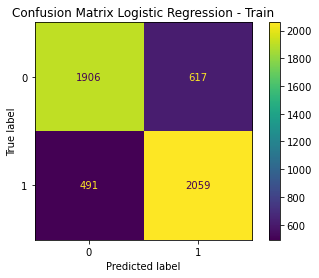

In [89]:
cm = metrics.confusion_matrix(Y_train, Y_predict_train)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix Logistic Regression - Train')
plt.show()

In [90]:
accuracy_train = round(metrics.accuracy_score(Y_train, Y_predict_train)*100,2)

precision_train = round(metrics.precision_score(Y_train, Y_predict_train)*100,2)

recall_train = round(metrics.recall_score(Y_train, Y_predict_train)*100,2)

f1_score_train = round(metrics.f1_score(Y_train, Y_predict_train)*100,2)

print(f'''
      As métricas do treino com todas as features foram:
      Acurária = {accuracy_train}%
      Precisão = {precision_train}%
      Recall = {recall_train}%
      F1 Score = {f1_score_train}%
      ''')


      As métricas do treino com todas as features foram:
      Acurária = 78.16%
      Precisão = 76.94%
      Recall = 80.75%
      F1 Score = 78.8%
      


##### Treino Com Feature Selection

In [91]:
X_train_standard = X_train_standard.loc[:, ffs_features]

In [92]:
model_lr = LogisticRegression()
model_lr = model_lr.fit(X_train_standard, Y_train)
Y_predict_train = model_lr.predict(X_train_standard)

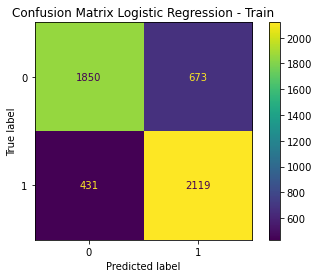

In [93]:
cm = metrics.confusion_matrix(Y_train, Y_predict_train)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix Logistic Regression - Train')
plt.show()

In [94]:
accuracy_train = round(metrics.accuracy_score(Y_train, Y_predict_train)*100,2)

precision_train = round(metrics.precision_score(Y_train, Y_predict_train)*100,2)

recall_train = round(metrics.recall_score(Y_train, Y_predict_train)*100,2)

f1_score_train = round(metrics.f1_score(Y_train, Y_predict_train)*100,2)

print(f'''
      As métricas do treino com as 'melhores' features foram:
      Acurária = {accuracy_train}%
      Precisão = {precision_train}%
      Recall = {recall_train}%
      F1 Score = {f1_score_train}%
      ''')


      As métricas do treino com as 'melhores' features foram:
      Acurária = 78.24%
      Precisão = 75.9%
      Recall = 83.1%
      F1 Score = 79.33%
      


##### Teste

In [95]:
X_test_standard = X_test_standard.loc[:, ffs_features]

In [96]:
Y_predict_test = model_lr.predict(X_test_standard)

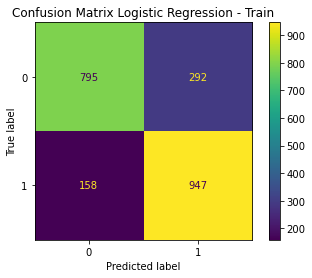

In [97]:
cm = metrics.confusion_matrix(Y_test, Y_predict_test)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix Logistic Regression - Train')
plt.show()

In [98]:
accuracy_test = round(metrics.accuracy_score(Y_test, Y_predict_test)*100,2)

precision_test = round(metrics.precision_score(Y_test, Y_predict_test)*100,2)

recall_test = round(metrics.recall_score(Y_test, Y_predict_test)*100,2)

f1_score_test = round(metrics.f1_score(Y_test, Y_predict_test)*100,2)

print(f'''
      As métricas do teste foram:
      Acurária = {accuracy_test}%
      Precisão = {precision_test}%
      Recall = {recall_test}%
      F1 Score = {f1_score_test}%
      ''')


      As métricas do teste foram:
      Acurária = 79.47%
      Precisão = 76.43%
      Recall = 85.7%
      F1 Score = 80.8%
      


### Encontrando os HiperParâmetros

In [99]:
distributions = dict(C=uniform(loc=0, scale=4),penalty=['l2', 'l1'])
distributions

{'C': <scipy.stats._distn_infrastructure.rv_frozen at 0x7f8e0c566310>,
 'penalty': ['l2', 'l1']}

In [100]:
rcv = RandomizedSearchCV(LogisticRegression(), distributions, random_state=123)
rcv = rcv.fit(X_train_standard, Y_train)
rcv.best_params_

{'C': 1.7138837047473028, 'penalty': 'l2'}

### Modelo com os HiperParâmetros

In [101]:
modelo = LogisticRegression(C=rcv.best_params_['C'], penalty=rcv.best_params_['penalty'])
modelo = modelo.fit(X_train_standard, Y_train)

In [102]:
Y_predict_test = modelo.predict(X_test_standard)

In [103]:
accuracy_test = round(metrics.accuracy_score(Y_test, Y_predict_test)*100,2)

precision_test = round(metrics.precision_score(Y_test, Y_predict_test)*100,2)

recall_test = round(metrics.recall_score(Y_test, Y_predict_test)*100,2)

f1_score_test = round(metrics.f1_score(Y_test, Y_predict_test)*100,2)

print(f'''
      As métricas do teste com HiperParams foram:
      Acurária = {accuracy_test}%
      Precisão = {precision_test}%
      Recall = {recall_test}%
      F1 Score = {f1_score_test}%
      ''')


      As métricas do teste com HiperParams foram:
      Acurária = 79.52%
      Precisão = 76.45%
      Recall = 85.79%
      F1 Score = 80.85%
      


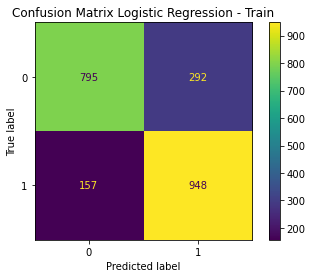

In [104]:
cm = metrics.confusion_matrix(Y_test, Y_predict_test)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix Logistic Regression - Train')
plt.show()

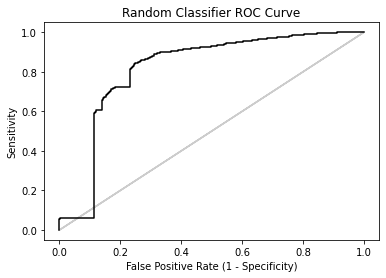

In [105]:
modelo_probabilidades = modelo.predict_proba(X_test_standard)[:, 1]
false_positive_rate_values, sensitivity_values, thresholds = metrics.roc_curve(Y_test, modelo_probabilidades, pos_label=1)

plt.step(false_positive_rate_values, sensitivity_values, color='black', where='post')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')

plt.step(np.arange(0, 1, 0.001), np.arange(0, 1, 0.001), color='black', alpha=0.2,
         where='post')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('Sensitivity')
plt.title('Random Classifier ROC Curve')

plt.show()

In [106]:
AUC = round(metrics.roc_auc_score(Y_test, modelo_probabilidades)*100,2)
print(f'{AUC}%')

84.75%


---
# Submit

In [115]:
df_submit['CryoSleep'] = df_submit['CryoSleep'].map(lambda x: 1 if x else 0)
df_submit['VIP'] = df_submit['CryoSleep'].map(lambda x: 1 if x else 0)
df_submit = pd.get_dummies(df_submit, columns=['HomePlanet', 'Destination'])
df_submit.reset_index(inplace=True, drop=True)

KeyError: "None of [Index(['HomePlanet', 'Destination'], dtype='object')] are in the [columns]"

In [108]:
X = df_submit.drop(['PassengerId', 'Cabin', 'Name'], axis=1)

standard_scaler = StandardScaler()

X_standard = standard_scaler.fit_transform(X)
X_standard = pd.DataFrame(X_standard, columns=X.columns, index=X.index)

In [109]:
X_standard = X_standard.loc[:, ffs_features]

In [110]:
Y = modelo.predict(X_standard)

In [111]:
submit = pd.DataFrame([])

In [112]:
submit['PassengerId'] = df_submit['PassengerId']
submit['Transported'] = Y
submit['Transported'] = submit['Transported'].map(lambda x: bool(x))

In [114]:
submit.to_csv('submission.csv', index=False)